# 부록) 케라스를 이용한 딥러닝 기초 (기본개념/다층 퍼셉트론)

* 싸이그래머 / 어바웃 파이썬
* 김무성

# 차례
* 딥러닝
* 케라스
* 케라스를 이용한 손글씨 영상 분류
* 케라스를 이용한 다층 퍼셉트론 구현

# 딥러닝

#### 참고
* [1] Deep learning - A Visual Introduction - https://www.slideshare.net/LuMa921/deep-learning-a-visual-introduction
* [2] 자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다. - https://www.slideshare.net/yongho/ss-79607172
* [3] Lecture 1 - 4 / CS231n: Convolutional Neural Networks for Visual Recognition (Stanford) - http://cs231n.stanford.edu/syllabus.html
* [4] 시즌 1 - 딥러닝의 기본 (TF 1.X lab 완료!) / 모두를 위한 머신러닝,딥러닝 - https://hunkim.github.io/ml/

<img src="sp_figures/sp_deep.png" width=600 />

# 케라스
* 설치
* 기본 개념

#### 참고
* [5] Keras: The Python Deep Learning library - https://keras.io/
* [6] 케라스 이야기 - https://tykimos.github.io/2017/01/27/Keras_Talk/

## 설치

In [1]:
# 최초 설치
#!pip install keras

## 케라스 기본 개념

케라스의 가장 핵심적인 데이터 구조는 바로 모델입니다. 케라스에서 제공하는 시퀀스 모델로 원하는 레이어를 쉽게 순차적으로 쌓을 수 있습니다. 다중 출력이 필요하는 등 좀 더 복잡한 모델을 구성하려면 케라스 함수 API를 사용하면 됩니다. 케라스로 딥러닝 모델을 만들 때는 다음과 같은 순서로 작성합니다. 다른 딥러닝 라이브러리와 비슷한 순서이지만 훨씬 직관적이고 간결합니다.

1) 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

2) 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

3) 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 <font color="red">compile()</font> 함수를 사용합니다.

4) 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 <font color="red">fit()</font> 함수를 사용합니다.

5) 학습과정 살펴보기
* 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
* 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.

6) 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 <font color="red">evaluate()</font> 함수를 사용합니다.

7) 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 <font color="red">predict()</font> 함수를 사용합니다.

# 케라스를 이용한 손글씨 영상 분류

#### 참고
* [6] 케라스 이야기 - https://tykimos.github.io/2017/01/27/Keras_Talk/

<img src="http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" width=600 />

In [2]:
# 벡엔드로 텐서플로우를 쓰려면 최초에 한번 텐서플로우를 설치해야 한다.
#!pip install tensorflow

In [3]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [4]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [6]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [7]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.7285 - acc: 0.8120

In [8]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.72854984664916989, 0.34961529381275175, 0.30004885469476383, 0.27020235426425931, 0.24768771462241809]
[0.81203333333333338, 0.9025333333333333, 0.91539999999999999, 0.92291666666666672, 0.93003333333333338]


In [9]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 73us/step
## evaluation loss and_metrics ##
[0.23357581582665443, 0.93259999999999998]


In [10]:
# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[  9.95582377e-05   2.33197582e-07   3.27006623e-04   2.15470046e-03
    3.94121116e-06   4.35928123e-05   6.55322125e-08   9.95897830e-01
    1.21055011e-04   1.35205593e-03]]


# 케라스를 이용한 다층 퍼셉트론 구현

* 뉴런
* 입출력을 모두 연결해주는 Dense 레이어
* 케라스를 이용한 다층 퍼셉트론 구현

#### 참고
* [7] 다층 퍼셉트론 레이어 이야기 - https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/
* [8] 다층 퍼셉트론 모델 만들어보기 - https://tykimos.github.io/2017/02/04/MLP_Getting_Started/

### 뉴런

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_neuron.png" />

세 개의 신호를 받아 하나의 신호를 전달하는 뉴런을 레고로 표현하면 다음과 같다. 
* 녹색 블럭은 시냅스의 강도
* 노란색과 빨간색 블럭은 연산자
* 파란색 블럭은 활성화 함수

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_1.png" />

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_2.png" />

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_3.png" />

### 입출력을 모두 연결해주는 Dense 레이어
* Dense 클래스 예시
* 쌓았던 레고를 실제 케라스로 구현. 4개의 입력 값을 받아 이진 분류하는 문제를 풀 수 있는 모델

#### Dense 클래스 예시
* Dense 클래스 사용 예제
* 이진 분류문제 예제 - sigmoid
* 다중클래스 분류문제 예제 - softmax
* Dense 레이어의 은닉층 사용 예제 - relu

##### Dense 클래스 사용 예제

```python
Dense(8, input_dim=4, init='uniform', activation='relu'))
```

* 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
* input_dim : 입력 뉴런의 수를 설정합니다.
* init : 가중치 초기화 방법 설정합니다.
    - ‘uniform’ : 균일 분포
    - ‘normal’ : 가우시안 분포
* activation : 활성화 함수 설정합니다.
    - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
    - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

##### 이진 분류문제 예제 - sigmoid
Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.



```python
Dense(1, input_dim=3, activation='sigmoid'))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_4.png" />

##### 다중클래스 분류문제 예제 - softmax
다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요합니다. 만약 세가지 종류로 분류한다면, 아래 코드처럼 출력 뉴런이 3개이고, 입력 뉴런과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 softmax를 사용합니다.


```python
Dense(3, input_dim=4, activation='softmax'))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_5.png" />

##### Dense 레이어의 은닉층 사용 예제 - relu 
Dense 레이어는 보통 출력층 이전의 은닉층으로도 많이 쓰이고, 영상이 아닌 수치자료 입력 시에는 입력층으로도 많이 쓰입니다. 이 때 활성화 함수로 ‘relu’가 주로 사용됩니다. ‘relu’는 학습과정에서 역전파 시에 좋은 성능이 나는 것으로 알려져 있습니다.

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=600 />

<img src="https://ljvmiranda921.github.io/assets/png/cs231n-ann/archi.png" width=600 />

```python
Dense(4, input_dim=6, activation='relu'))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_6.png" />

또한 입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 있기 때문에 input_dim을 지정하지 않아도 됩니다. 아래 코드를 보면, 입력층에만 input_dim을 정의하였고, 이후 층에서는 input_dim을 지정하지 않았습니다.

```python
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_MLP_Layer_Talk_lego_7.png" />

#### 쌓았던 레고를 실제 케라스로 구현. 4개의 입력 값을 받아 이진 분류하는 문제를 풀 수 있는 모델

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform", activation="relu", input_dim=4)`
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="uniform", activation="relu")`
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`


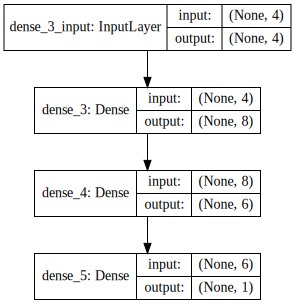

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


### 케라스를 이용한 다층 퍼셉트론 구현
* 문제 정의하기
* 데이터 준비하기
* 데이터셋 생성하기
* 모델 구성하기
* 모델 학습과정 설정하기
* 모델 학습시키기
* 모델 평가하기

#### 참고
* [8] 다층 퍼셉트론 모델 만들어보기 - https://tykimos.github.io/2017/02/04/MLP_Getting_Started/

#### 문제 정의하기

In [13]:
# -- coding

#### 데이터 준비하기

In [14]:
# -- coding

#### 데이터셋 생성하기

In [ ]:
# -- coding

#### 모델 구성하기

In [ ]:
# -- coding

#### 모델 학습과정 설정하기

In [ ]:
# -- coding

#### 모델 학습시키기

In [ ]:
# -- coding

#### 모델 평가하기

In [ ]:
# -- coding

# 참고자료 
* [1] Deep learning - A Visual Introduction - https://www.slideshare.net/LuMa921/deep-learning-a-visual-introduction
* [2] 자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다. - https://www.slideshare.net/yongho/ss-79607172
* [3] Lecture 1 - 4 / CS231n: Convolutional Neural Networks for Visual Recognition (Stanford) - http://cs231n.stanford.edu/syllabus.html
* [4] 시즌 1 - 딥러닝의 기본 (TF 1.X lab 완료!) / 모두를 위한 머신러닝,딥러닝 - https://hunkim.github.io/ml/
* [5] Keras: The Python Deep Learning library - https://keras.io/
* [6] 케라스 이야기 - https://tykimos.github.io/2017/01/27/Keras_Talk/
* [7] 다층 퍼셉트론 레이어 이야기 - https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/
* [8] 다층 퍼셉트론 모델 만들어보기 - https://tykimos.github.io/2017/02/04/MLP_Getting_Started/